## Foundations of Probability

Our goal is to learn from data through construction of statistical models.  Explicit in this is statistics which demands understanding and adherance to rules of probability.  In this section, we will lay out the basic foundations of probability and give examples to assist in our understanding.  Our general flow will be to understand the rules of probability and how to manipulate them, move to probability distributions and descriptive statistics, touch on likelihood and Bayes, and end with a discussion on inference.   

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Principles of Probability

In this section, we will lay out the principals guiding our models -- probability and statistics.  

Outline of discussion:
    
* Stochastic processes -- chance regularities
* Beleif and probability
* Rules of probabillity
* Factoring joing probabilities

General references:
  
+ Statistical Inference (9780534243128): Casella, George, Berger, Roger L.  
+ Probability Theory and Statistical Inference: Empirical Modeling with Observational Data (9781107185142): Spanos, A.  
+ Bayesian Models: A Statistical Primer for Ecologists (9780691159287): Hobbs, N. Thompson, Hooten, Mevin B.  
+ A First Course in Bayesian Statistical Methods (0387922997): Hoff, Peter D.

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Chance regularities

The processes we are interested in are non-deterministic (exhibits chance) where patterns reveal themselves (show regularities) after collection lots of data.  Arguably, modeern statistics started with quantifying betting odds in dice games such as the sum of spots (for example, see [Feldman and Morgan](http://jse.amstat.org/v11n2/feldman.html) for a discussion of HOG).  To illustrate this, consider a game of dice where we throw 2 dice and sum the dots.  Let's simulate this in python and look at the data.

In [1]:
## simulate 500 rolls of 2 dice using random sampling with replacement
import random
import pandas as pd
random.seed(13457)
total_rolls = 1000 
numbers = range(0,total_rolls-1)
evens = list(filter(lambda x: x % 2, numbers))
odds = [x+1 for x in evens]

dice = [1, 2, 3, 4, 5, 6]
rolls = random.choices(dice,k=total_rolls)
rolls1 = [rolls[i] for i in evens]
rolls2 = [rolls[i] for i in odds]

df = pd.DataFrame({'die1' : rolls1,
                   'die2' : rolls2})
df.loc[:,'dots'] = df.sum(axis=1)

## look at the first 10 dice throws
df.head(n=10)

,die1,die2,dots
0,6,2,8
1,6,4,10
2,1,6,7
3,5,3,8
4,3,5,8
5,5,2,7
6,1,6,7
7,6,5,11
8,2,4,6
9,6,6,12


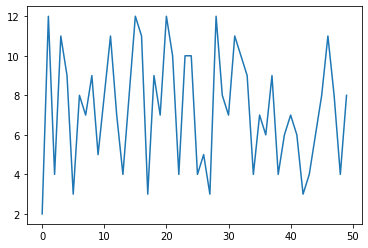

In [16]:
# view the first 50 throws
tplot = df['dots'].head(n=50).plot()

In [17]:
# summarize the dot counts
df['dots'].value_counts()

7     92
6     79
8     73
9     47
5     46
10    40
4     35
3     32
11    27
12    15
2     14
Name: dots, dtype: int64

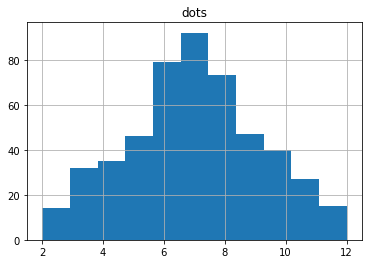

In [18]:
# plot the frequencies as counts
h = df.hist(column='dots', bins=11)

In this simulated game, we notice:

    * we are not able to predice with certainty the next throw  
    * some combinations occur with higher frequency  
    * the shape of the tabulated data is roughly triangular  

### Belief and probability

So, from this and maybe experience, we see that 7's occur more frequently than 12's, 5's and 9's about the same, etc, so we have a beleif.  How do we go from a 'hunch' to a quantified understanding of the game?  The answer is statistics and probability.


<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Sample space, outcomes and events

To get at an understanding of probability, we need some definitions.

1. outcomes -- mutually exclusive and exhaustive list of possible results in a model  
2. events -- sets containing zero or more outcomes, we define events we are interested in  
3. sample space -- set of all possible outcomes (must be collectively exhaustive and mutually exclusive). 

Consider the dice game.

Outcomes: 2,3,4,5,6,7,8,9,10,11,12  
Events: up to us, what game we play, could be evens vs odds for instance  
Sample space: 2,3,4,5,6,7,8,9,10,11,12  

Throwing 3 coins, counting the heads, evens wins 

Outcomes: 0,1,2,3  
Events: {0,2}, {1,3}  
Sample space: 0,1,2,3  

To conform with the set theory behind this, the event space ($\mathcal{F}$) must conform to a series of conditions:

1. the event space contains the sample space $S \in \mathcal{F}$   
2. the event space is closed under compliments, ie if $E \in \mathcal{F}, E^c \in \mathcal{F}$  
3. the event space is closed under countable unions, $E_i \in \mathcal{F}$ for i=1,2,..., then $(\bigcup_{i=1}^{\infty}E_i) \in \mathcal{F}$

For completeness, we would need to include the empty set and the sample space to both event lists if we had wanted to enumerate the events in the event space.



<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Probability Space and Probability

Armed with some definitions of outcomes and events, we are finally ready to talk about probability.

A probability space is a combination of a sample space, event space, and probability function.  The probability function is a real-valued function mapping events to the interval [0,1].  The probability function adheres to the Axioms of Probability (Kolmogorov Axioms).  These are summarized as:
    
1. the probability of an event is a real number on the interval [0,1]  
    
    $0 \le P(E) \le 1$  
    <br>
2. the probability of at least one event occuring is 1  
    
    $P(S) = 1$, where S is the sample space  
    <br>
3. countable mutually exclusive sets of events satisfy the following  
    
    $P(\bigcup_{i=1}^\infty E_i) = \sum_{i=1}^\infty P(E_i)$  
<br>
<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Addition rules

Addition rules deal with unions ($\bigcup$) of events.  These can be thought of OR probabilities.  

($\bigcup$ - non-repeating superset, $\bigcap$ - common elements)  

P(A $\cup$ B) = P(A) + P(B) - P(A $\cap$ B)

    or when A and B are mutually exclusive
    
P(A $\cup$ B) = P(A) + P(B)


In the figure below, A represents a case where events in the two shaded regions are mutually exclusive, ie there are no overlapping areas.  In B, the overlapping area is the intersection ($\bigcap$) of the two areas.
![Figure 1](sets.jpg)

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Multiplication rules

Multiplication rules deal with intersections ($\bigcup$) of events.  These can be thought of AND probabilities.  

($\bigcup$ - non-repeating superset, $\bigcap$ - common elements)  

Dependent  
P(A $\cap$ B) = P(A) $\ast$ P(B|A) 

Independent  
P(A $\cap$ B) = P(A) $\ast$ P(B)   

Mutually exclusive  
P(A $\cap$ B) = 0

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Conditional, Independent, disjoint, exchangeable

Conditional  
P(A|B) = $\frac{P(A,B)}{P(B)}$  

Independent  
P(A,B) = P(A) $\ast$ P(B)  

Disjoint  
P(A,B) = 0

Exhangeable  
P(A then B) = P(B then A)

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Factoring joint probabilities

Given a joint probability, we often need to simplify to get to some tractable or known distribution.  We can do this via the rules given above and the chain rule.

P(A,B) = P(A|B) $\ast$ P(B)  

P(A,B,C) = P(A|B,C) $\ast$ P(B,C) = P(A|B,C) $\ast$ P(B|C) $\ast$ P(C)

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Random variable

Random variables are (often) real-valued functions mapping outcomes to a measureable space.  In set notation, this looks like:  

$X: \Omega \to \mathbb{R}$

This mapping defines the probability giving by X in a measureable set as:  

$P(X \in S) = P({x \in \Omega | X(x) \in S})$ 

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### Random sample, experiment, trial

Random sample = unbiased realization of outcomes  
Random experiment = an activity with an observable result    
Trial = 1 or more experiments  


In the figure and table below, we are plotting and tabulating the results from the roll of two dice.  We did not define the experiment up front, but will do so now for clarity.

Experiment = throw 2 dice 500 times  
Trial = in this case, there was a single trial of the experiment  
Random sample = we have 500 realizations of two dice being thrown  

Note, due to how random numbers are generated and used to get the die rolls, we sampled with replacement into a long 1000 long list.  We then pulled the list into two sequences with every other 1 being die1 vs die2.  We could have done this in a for loop rolling both dice in each iteration.  Based on how randon numbers are generated, this would have resulted in the same sequence of die rolls.


<br>
<br>
<hr style="border:2px solid blue"> </hr>

In [44]:
## look at the first 10 dice throws
print(df.head(n=10))

   die1  die2  dots
0     6     2     8
1     6     4    10
2     1     6     7
3     5     3     8
4     3     5     8
5     5     2     7
6     1     6     7
7     6     5    11
8     2     4     6
9     6     6    12


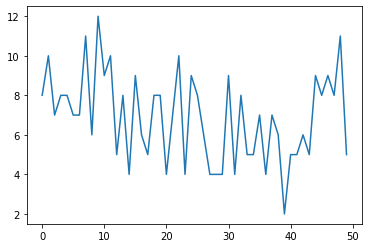

In [43]:
# view the first 50 throws
tplot = df['dots'].head(n=50).plot()

### Data generating mechanism

This is the actual process we are trying to model.  In the case of the dice, it was the throwing and counting of dots where we are lookign to learn (and use) a statistical model of outcome probabilities.  In a count toss experiment, it is the binary outcome of heads or tails.


<br>
<br>
<hr style="border:2px solid blue"> </hr>

### UNGRADED EVALUATION (20 min)

#### 1. For each of the following experiments, describe the sample space:

(1a) Toss 2 coins 3 times.  
 a- {(HH),(TT),(HT),(TH)} (C)  
 b- {HH),(TT),(HT),(TH),HH),(TT),(HT),(TH),HH),(TT),(HT),(TH)}  
 
(1b) Record the number of cats that pass by your house in 1 hour.  
 a- $\mathbb{R}$  
 b- $\mathbb{R}_+$  
 c- integers > 0. (C). 

(1c) In a clinic, you record the sex, height, and weight of 100 individuals for a study.  
 a- (F,$\mathbb{R}$,$\mathbb{R}$), (M,$\mathbb{R}$  ,$\mathbb{R}$)  
 b- (F,$\mathbb{R}_+$,$\mathbb{R}_+$), (M,$\mathbb{R}_+$,$\mathbb{R}_+$) (C)

#### 2. Darts

You are in the local pub playing darts.  Based on luck, you have 1/50 chance of hitting a bullseye in a single throw of a dart.

(2a) What is the probability of hitting the bullseye in 1 throw (in 0.0%)?  
  a- 2.0

(2b) You throw the dart a second time, are the throws dependent or independent?
  a- dependent  
  b- independent  (C)
  
(2c) What is the probability of hitting the bullseye in the second throw (in 0.0%)?  
  a- 2.0

(2c) What is the probability of hitting at least 1 bullseye in 5 throws (in 0.0%)?
  a- 9.6



#### 3. 

You are rolling a single 6 sided die and counting dots.

(3a) What is the probability of rolling a 3 or more assuming a fair die?  
  a- 0.67  

(3b) You change the game and roll 2 dice, what is the probability of rolling 3 total dots or less?
  a- 0.08  

(3c) Rolling 2 dice, the first lands 1 while the second rolls off the table, what is the probability of that you have a total of 3 or less dots?  
  a- 0.33  

<br>
<br>
<hr style="border:2px solid blue"> </hr>

### GRADED EVALUATION (15 mins)

1. You repeatedly roll a die and come up with the following probability of roll results for spots 1-6 in order: {0.14,0.10,0.20,0.14,0.14,0.28).  The probability of rolling a 3 is greater than that of rolling a 4.

   a. True (C)

   b. False 


2. The die in the previous question is fair. 

   a. True 

   b. False (C)


3. Two events are independent.  The joint probability of these two events occuring is:  

   a. P(A,B) = P(A) * P(B) (C)

   b. P(A,B) = 0


4. You toss a both a fair coin and a fair die simulteneously.  The sample space is:  

   a. {(HT),(1,2,3,4,5,6)}

   b. {(H,1),(H,2),(H,3),(H,4),(H,5),(H,6),(T,1),(T,2),(T,3),(T,4),(T,5),(T,6)} (C)


5. In this game of tossing a coin and die, the die comes up 6.  What is the probability of the coin landing heads?

   a. 0.5 (C)

   b. 0.8
   
   
6.  You do the game twice, in the first trial, it came up (H,6).  What is the probability that event will occur in the second go (0.00%)?

   a. 0.69

   b. 0.83 (C)
   
<br>
<br>
<hr style="border:2px solid blue"> </hr>